In [1]:
import numpy as np
from optic.torchUtils import slidingWindowDataSet, MLP
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset, ConcatDataset
from optic.comm.modulation import GrayMapping, modulateGray, demodulateGray
from optic.dsp.core import pulseShape, lowPassFIR, pnorm, signal_power
from optic.utils import parameters, dBm2W
from optic.models.devices import mzm, photodiode, edfa
from optic.comm.modulation import GrayMapping, modulateGray, demodulateGray

from tqdm.notebook import tqdm
from commpy.utilities  import upsample
from optic.dsp.core import firFilter
from optic.models.channels import linearFiberChannel
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
import OpticFunctions as of
import importlib
import IPython.display as ipd

In [3]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize

figsize(10, 6)

In [4]:
np.random.seed(seed=123)

In [5]:
# Parâmetros para geração de sinal
SpS = 16
Rs = 40e9
M = 8
num_symbs = 5e3
dist_fibra = 10

In [6]:
#sinaltx, symbtx = of.SimulaSinalOptico(SpS = SpS, Rs = Rs, M = M, num_symbs = num_symbs)

In [7]:
#sinalrx = of.SimulaCanalOptico(sinal = sinaltx, SpS = SpS, Rs = Rs, dist_fibra = dist_fibra)

In [8]:
Ntaps = 2
batch_size = 100
shuffle = True
shuffle_full = False
const = GrayMapping(M, 'pam') 
Es = signal_power(const)

In [9]:
'''

train_dataset, test_dataset, full_dataset = of.CriaDataSet(symbtx, sinalrx, SpS, Ntaps = Ntaps)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=shuffle)
full_dataloader = DataLoader(full_dataset, batch_size=len(full_dataset), shuffle=shuffle_full)'''

'\n\ntrain_dataset, test_dataset, full_dataset = of.CriaDataSet(symbtx, sinalrx, SpS, Ntaps = Ntaps)\n\ntrain_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)\ntest_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=shuffle)\nfull_dataloader = DataLoader(full_dataset, batch_size=len(full_dataset), shuffle=shuffle_full)'

In [10]:
#modelo_mlp = MLP([2, 6, 3, 1])

In [11]:
'''loss_fn = nn.MSELoss()
epochs_mlp = 100
optimizer = torch.optim.Adam(modelo_mlp.parameters(), lr = 0.0005)
cada_print = 50

for t in range(epochs_mlp):
    print(f"Época {t+1}\n-------------------------------")
    of.train_loop(train_dataloader, modelo_mlp, loss_fn, optimizer, cada_print)
    of.test_loop(test_dataloader, modelo_mlp, loss_fn)
print("Pronto!")

framerate = 44100
t = np.linspace(0,1,framerate*1)
data = np.sin(2*np.pi*220*t) + np.sin(2*np.pi*224*t)
ipd.Audio(data,rate=framerate, autoplay=True)'''

'loss_fn = nn.MSELoss()\nepochs_mlp = 100\noptimizer = torch.optim.Adam(modelo_mlp.parameters(), lr = 0.0005)\ncada_print = 50\n\nfor t in range(epochs_mlp):\n    print(f"Época {t+1}\n-------------------------------")\n    of.train_loop(train_dataloader, modelo_mlp, loss_fn, optimizer, cada_print)\n    of.test_loop(test_dataloader, modelo_mlp, loss_fn)\nprint("Pronto!")\n\nframerate = 44100\nt = np.linspace(0,1,framerate*1)\ndata = np.sin(2*np.pi*220*t) + np.sin(2*np.pi*224*t)\nipd.Audio(data,rate=framerate, autoplay=True)'

In [12]:
#torch.save(modelo_mlp, 'PrimeModel.pth')

In [13]:
#modelo_mlp = torch.load('PrimeModel.pth')

In [14]:
'''symb_mlp = of.GeraSinalEqualizado(modelo_mlp, full_dataloader)

#print(symb_rx_nn.shape)
bitsrx = demodulateGray(np.sqrt(Es)*pnorm(symb_mlp), M, 'pam')
bitstx = demodulateGray(np.sqrt(Es)*pnorm(symbtx), M, 'pam')

of.CalculaBER(bitstx, bitsrx)'''

"symb_mlp = of.GeraSinalEqualizado(modelo_mlp, full_dataloader)\n\n#print(symb_rx_nn.shape)\nbitsrx = demodulateGray(np.sqrt(Es)*pnorm(symb_mlp), M, 'pam')\nbitstx = demodulateGray(np.sqrt(Es)*pnorm(symbtx), M, 'pam')\n\nof.CalculaBER(bitstx, bitsrx)"

# Treinamento das redes clone para outras distâncias de transmissão

### Estruturação dos conjuntos de dados

In [15]:
sinalt4, symbt4 = of.SimulaSinalOptico(SpS = SpS, Rs = Rs, M = M, num_symbs = num_symbs)
sinalt6, symbt6 = of.SimulaSinalOptico(SpS = SpS, Rs = Rs, M = M, num_symbs = num_symbs)
sinalt10, symbt10 = of.SimulaSinalOptico(SpS = SpS, Rs = Rs, M = M, num_symbs = num_symbs)
#sinalt12, symbt12 = of.SimulaSinalOptico(SpS = SpS, Rs = Rs, M = M, num_symbs = num_symbs)

SymbTx antes da normalização:  [-1. -7. -3. ...  7. -3. -5.]
SymbTx antes da normalização:  [-5. -3. -3. ...  5.  5.  3.]
SymbTx antes da normalização:  [-3. -5.  7. ...  1. -5. -1.]


In [16]:
sinalr4 = of.SimulaCanalOptico(sinal = sinalt4, SpS = SpS, Rs = Rs, dist_fibra = 4)
sinalr6 = of.SimulaCanalOptico(sinal = sinalt6, SpS = SpS, Rs = Rs, dist_fibra = 3)
sinalr10 = of.SimulaCanalOptico(sinal = sinalt10, SpS = SpS, Rs = Rs, dist_fibra = 5)
#sinalr12 = of.SimulaCanalOptico(sinal = sinalt12, SpS = SpS, Rs = Rs, dist_fibra = 12)

In [17]:
train_dataset4, test_dataset4, full_dataset4 = of.CriaDataSet(symbt4, sinalr4, SpS, Ntaps = Ntaps)

train_dataloader4 = DataLoader(train_dataset4, batch_size=batch_size, shuffle=shuffle)
test_dataloader4 = DataLoader(test_dataset4, batch_size=batch_size, shuffle=shuffle)
full_dataloader4 = DataLoader(full_dataset4, batch_size=len(full_dataset4), shuffle=shuffle_full)


train_dataset6, test_dataset6, full_dataset6 = of.CriaDataSet(symbt6, sinalr6, SpS, Ntaps = Ntaps)

train_dataloader6 = DataLoader(train_dataset6, batch_size=batch_size, shuffle=shuffle)
test_dataloader6 = DataLoader(test_dataset6, batch_size=batch_size, shuffle=shuffle)
full_dataloader6 = DataLoader(full_dataset6, batch_size=len(full_dataset6), shuffle=shuffle_full)


train_dataset10, test_dataset10, full_dataset10 = of.CriaDataSet(symbt10, sinalr10, SpS, Ntaps = Ntaps)

train_dataloader10 = DataLoader(train_dataset10, batch_size=batch_size, shuffle=shuffle)
test_dataloader10 = DataLoader(test_dataset10, batch_size=batch_size, shuffle=shuffle)
full_dataloader10 = DataLoader(full_dataset10, batch_size=len(full_dataset10), shuffle=shuffle_full)


#train_dataset12, test_dataset12, full_dataset12 = of.CriaDataSet(symbt12, sinalr12, SpS, Ntaps = Ntaps)

#train_dataloader12 = DataLoader(train_dataset12, batch_size=batch_size, shuffle=shuffle)
#test_dataloader12 = DataLoader(test_dataset12, batch_size=batch_size, shuffle=shuffle)
#full_dataloader12 = DataLoader(full_dataset12, batch_size=len(full_dataset12), shuffle=shuffle_full)

### Criação de modelos, hiperparâmetros e função de teste

In [81]:
model_test = MLP([2, 6, 5, 1])

In [19]:
grid_folder = "Modelos_Grid_Search"
caminho = os.path.join(grid_folder, f"Modelo65.pth")


In [107]:
model4 = torch.load(caminho)
model6 = torch.load(caminho)
model10 = torch.load(caminho)
#model12 = torch.load('PrimeModel.pth')

In [108]:
loss_fn = nn.MSELoss()
epochs_mlp = 220
cada_print = 10

optimizer_test = torch.optim.Adam(model_test.parameters(),  lr = 0.0005)
optimizer4 = torch.optim.Adam(model4.parameters(), lr = 0.0005)
optimizer6 = torch.optim.Adam(model6.parameters(), lr = 0.0005)
optimizer10 = torch.optim.Adam(model10.parameters(), lr = 0.0005)

In [63]:
def test_learning(progress_dataloader, equalizer, loss, loss_list):
    size = len(progress_dataloader.dataset)
    num_batches = len(progress_dataloader)
    equalizer.eval()
    eval_loss = 0
    with torch.no_grad():
        for x, y in progress_dataloader:
            x, y = x.float(), y.float()
            pred = equalizer(x)
            eval_loss += loss(pred, y).item()
    eval_loss /= num_batches
    loss_list.append(eval_loss)
    print(f"Perda média: {eval_loss:>8f} \n")
    return loss_list

## Comparação entre modelos para 4 km

In [84]:
loss_list = []

for t in range(epochs_mlp):
    print(f"Época {t+1}\n-------------------------------")
    of.train_loop(train_dataloader4, model4, loss_fn, optimizer4, cada_print)
    loss_list4 = test_learning(test_dataloader4, model4, loss_fn, loss_list)
print("Pronto!")

#framerate = 44100
#t = np.linspace(0,1,framerate*1)
#data = np.sin(2*np.pi*220*t) + np.sin(2*np.pi*224*t)
#ipd.Audio(data,rate=framerate, autoplay=True)

Época 1
-------------------------------
loss: 0.035039[  100/ 4000]
loss: 0.029119[ 1100/ 4000]
loss: 0.037902[ 2100/ 4000]
loss: 0.031439[ 3100/ 4000]
Perda média: 0.026074 

Época 2
-------------------------------
loss: 0.030771[  100/ 4000]
loss: 0.027281[ 1100/ 4000]
loss: 0.025204[ 2100/ 4000]
loss: 0.027456[ 3100/ 4000]
Perda média: 0.023130 

Época 3
-------------------------------
loss: 0.022900[  100/ 4000]
loss: 0.028352[ 1100/ 4000]
loss: 0.028836[ 2100/ 4000]
loss: 0.019043[ 3100/ 4000]
Perda média: 0.021494 

Época 4
-------------------------------
loss: 0.029823[  100/ 4000]
loss: 0.021476[ 1100/ 4000]
loss: 0.028201[ 2100/ 4000]
loss: 0.018556[ 3100/ 4000]
Perda média: 0.019963 

Época 5
-------------------------------
loss: 0.022424[  100/ 4000]
loss: 0.016695[ 1100/ 4000]
loss: 0.023643[ 2100/ 4000]
loss: 0.019986[ 3100/ 4000]
Perda média: 0.018755 

Época 6
-------------------------------
loss: 0.021357[  100/ 4000]
loss: 0.014888[ 1100/ 4000]
loss: 0.016452[ 2100/ 40

loss: 0.009510[ 1100/ 4000]
loss: 0.007718[ 2100/ 4000]
loss: 0.007834[ 3100/ 4000]
Perda média: 0.008246 

Época 50
-------------------------------
loss: 0.007323[  100/ 4000]
loss: 0.008084[ 1100/ 4000]
loss: 0.006959[ 2100/ 4000]
loss: 0.007443[ 3100/ 4000]
Perda média: 0.008273 

Época 51
-------------------------------
loss: 0.007090[  100/ 4000]
loss: 0.010475[ 1100/ 4000]
loss: 0.008969[ 2100/ 4000]
loss: 0.008195[ 3100/ 4000]
Perda média: 0.008239 

Época 52
-------------------------------
loss: 0.009995[  100/ 4000]
loss: 0.008477[ 1100/ 4000]
loss: 0.006895[ 2100/ 4000]
loss: 0.007851[ 3100/ 4000]
Perda média: 0.008316 

Época 53
-------------------------------
loss: 0.008253[  100/ 4000]
loss: 0.010323[ 1100/ 4000]
loss: 0.007281[ 2100/ 4000]
loss: 0.007432[ 3100/ 4000]
Perda média: 0.008214 

Época 54
-------------------------------
loss: 0.008094[  100/ 4000]
loss: 0.009097[ 1100/ 4000]
loss: 0.009531[ 2100/ 4000]
loss: 0.006634[ 3100/ 4000]
Perda média: 0.008253 

Época 5

loss: 0.007466[ 3100/ 4000]
Perda média: 0.008352 

Época 96
-------------------------------
loss: 0.007564[  100/ 4000]
loss: 0.010269[ 1100/ 4000]
loss: 0.007346[ 2100/ 4000]
loss: 0.010453[ 3100/ 4000]
Perda média: 0.008193 

Época 97
-------------------------------
loss: 0.008662[  100/ 4000]
loss: 0.008203[ 1100/ 4000]
loss: 0.010797[ 2100/ 4000]
loss: 0.009614[ 3100/ 4000]
Perda média: 0.008237 

Época 98
-------------------------------
loss: 0.009811[  100/ 4000]
loss: 0.008944[ 1100/ 4000]
loss: 0.008134[ 2100/ 4000]
loss: 0.009237[ 3100/ 4000]
Perda média: 0.008230 

Época 99
-------------------------------
loss: 0.008157[  100/ 4000]
loss: 0.008881[ 1100/ 4000]
loss: 0.007673[ 2100/ 4000]
loss: 0.007028[ 3100/ 4000]
Perda média: 0.008243 

Época 100
-------------------------------
loss: 0.009125[  100/ 4000]
loss: 0.008538[ 1100/ 4000]
loss: 0.008155[ 2100/ 4000]
loss: 0.008735[ 3100/ 4000]
Perda média: 0.008169 

Época 101
-------------------------------
loss: 0.008528[  100

loss: 0.007416[ 2100/ 4000]
loss: 0.006466[ 3100/ 4000]
Perda média: 0.007963 

Época 144
-------------------------------
loss: 0.007385[  100/ 4000]
loss: 0.006911[ 1100/ 4000]
loss: 0.009854[ 2100/ 4000]
loss: 0.008173[ 3100/ 4000]
Perda média: 0.007915 

Época 145
-------------------------------
loss: 0.008760[  100/ 4000]
loss: 0.009250[ 1100/ 4000]
loss: 0.009273[ 2100/ 4000]
loss: 0.008407[ 3100/ 4000]
Perda média: 0.008000 

Época 146
-------------------------------
loss: 0.008121[  100/ 4000]
loss: 0.007879[ 1100/ 4000]
loss: 0.008606[ 2100/ 4000]
loss: 0.008291[ 3100/ 4000]
Perda média: 0.007989 

Época 147
-------------------------------
loss: 0.009079[  100/ 4000]
loss: 0.008870[ 1100/ 4000]
loss: 0.008095[ 2100/ 4000]
loss: 0.010447[ 3100/ 4000]
Perda média: 0.008090 

Época 148
-------------------------------
loss: 0.009250[  100/ 4000]
loss: 0.008502[ 1100/ 4000]
loss: 0.009254[ 2100/ 4000]
loss: 0.009027[ 3100/ 4000]
Perda média: 0.007884 

Época 149
--------------------

Perda média: 0.007839 

Época 192
-------------------------------
loss: 0.007647[  100/ 4000]
loss: 0.007638[ 1100/ 4000]
loss: 0.008932[ 2100/ 4000]
loss: 0.005880[ 3100/ 4000]
Perda média: 0.007804 

Época 193
-------------------------------
loss: 0.007908[  100/ 4000]
loss: 0.007536[ 1100/ 4000]
loss: 0.007349[ 2100/ 4000]
loss: 0.006377[ 3100/ 4000]
Perda média: 0.007880 

Época 194
-------------------------------
loss: 0.007784[  100/ 4000]
loss: 0.006415[ 1100/ 4000]
loss: 0.007398[ 2100/ 4000]
loss: 0.008191[ 3100/ 4000]
Perda média: 0.007829 

Época 195
-------------------------------
loss: 0.008028[  100/ 4000]
loss: 0.007090[ 1100/ 4000]
loss: 0.007315[ 2100/ 4000]
loss: 0.014011[ 3100/ 4000]
Perda média: 0.007888 

Época 196
-------------------------------
loss: 0.006626[  100/ 4000]
loss: 0.008808[ 1100/ 4000]
loss: 0.007397[ 2100/ 4000]
loss: 0.008869[ 3100/ 4000]
Perda média: 0.007847 

Época 197
-------------------------------
loss: 0.008216[  100/ 4000]
loss: 0.008329[ 

In [85]:
loss_list_test = []
for t in range(epochs_mlp):
    print(f"Época {t+1}\n-------------------------------")
    of.train_loop(train_dataloader4, model_test, loss_fn, optimizer_test, cada_print)
    loss_listnl = test_learning(test_dataloader4, model_test, loss_fn, loss_list_test)
print("Pronto!")

#framerate = 44100
#t = np.linspace(0,1,framerate*1)
#data = np.sin(2*np.pi*220*t) + np.sin(2*np.pi*224*t)
#ipd.Audio(data,rate=framerate, autoplay=True)

Época 1
-------------------------------
loss: 1.303216[  100/ 4000]
loss: 0.981655[ 1100/ 4000]
loss: 1.117039[ 2100/ 4000]
loss: 1.306650[ 3100/ 4000]
Perda média: 1.174764 

Época 2
-------------------------------
loss: 1.284269[  100/ 4000]
loss: 1.346248[ 1100/ 4000]
loss: 1.064933[ 2100/ 4000]
loss: 0.927745[ 3100/ 4000]
Perda média: 1.136556 

Época 3
-------------------------------
loss: 1.055409[  100/ 4000]
loss: 1.075354[ 1100/ 4000]
loss: 1.108593[ 2100/ 4000]
loss: 1.086002[ 3100/ 4000]
Perda média: 1.087016 

Época 4
-------------------------------
loss: 1.058576[  100/ 4000]
loss: 1.137141[ 1100/ 4000]
loss: 1.024686[ 2100/ 4000]
loss: 1.281433[ 3100/ 4000]
Perda média: 1.014134 

Época 5
-------------------------------
loss: 1.101874[  100/ 4000]
loss: 1.187649[ 1100/ 4000]
loss: 0.840376[ 2100/ 4000]
loss: 0.902157[ 3100/ 4000]
Perda média: 0.913939 

Época 6
-------------------------------
loss: 0.711788[  100/ 4000]
loss: 0.692561[ 1100/ 4000]
loss: 0.810695[ 2100/ 40

loss: 0.006800[ 1100/ 4000]
loss: 0.004972[ 2100/ 4000]
loss: 0.005475[ 3100/ 4000]
Perda média: 0.005349 

Época 49
-------------------------------
loss: 0.006078[  100/ 4000]
loss: 0.003944[ 1100/ 4000]
loss: 0.005198[ 2100/ 4000]
loss: 0.006257[ 3100/ 4000]
Perda média: 0.005173 

Época 50
-------------------------------
loss: 0.004187[  100/ 4000]
loss: 0.005799[ 1100/ 4000]
loss: 0.004945[ 2100/ 4000]
loss: 0.005703[ 3100/ 4000]
Perda média: 0.005030 

Época 51
-------------------------------
loss: 0.005452[  100/ 4000]
loss: 0.005635[ 1100/ 4000]
loss: 0.004612[ 2100/ 4000]
loss: 0.004284[ 3100/ 4000]
Perda média: 0.004927 

Época 52
-------------------------------
loss: 0.004367[  100/ 4000]
loss: 0.003588[ 1100/ 4000]
loss: 0.004653[ 2100/ 4000]
loss: 0.004581[ 3100/ 4000]
Perda média: 0.004835 

Época 53
-------------------------------
loss: 0.004851[  100/ 4000]
loss: 0.004466[ 1100/ 4000]
loss: 0.004334[ 2100/ 4000]
loss: 0.003770[ 3100/ 4000]
Perda média: 0.004734 

Época 5

loss: 0.003898[ 1100/ 4000]
loss: 0.005580[ 2100/ 4000]
loss: 0.004688[ 3100/ 4000]
Perda média: 0.004194 

Época 96
-------------------------------
loss: 0.003741[  100/ 4000]
loss: 0.004267[ 1100/ 4000]
loss: 0.003877[ 2100/ 4000]
loss: 0.004185[ 3100/ 4000]
Perda média: 0.004237 

Época 97
-------------------------------
loss: 0.005811[  100/ 4000]
loss: 0.003981[ 1100/ 4000]
loss: 0.003977[ 2100/ 4000]
loss: 0.004095[ 3100/ 4000]
Perda média: 0.004088 

Época 98
-------------------------------
loss: 0.003548[  100/ 4000]
loss: 0.004342[ 1100/ 4000]
loss: 0.004639[ 2100/ 4000]
loss: 0.003252[ 3100/ 4000]
Perda média: 0.004103 

Época 99
-------------------------------
loss: 0.004573[  100/ 4000]
loss: 0.008587[ 1100/ 4000]
loss: 0.004644[ 2100/ 4000]
loss: 0.004940[ 3100/ 4000]
Perda média: 0.004159 

Época 100
-------------------------------
loss: 0.003574[  100/ 4000]
loss: 0.003491[ 1100/ 4000]
loss: 0.004311[ 2100/ 4000]
loss: 0.004618[ 3100/ 4000]
Perda média: 0.004098 

Época 

loss: 0.003141[ 3100/ 4000]
Perda média: 0.004023 

Época 142
-------------------------------
loss: 0.003871[  100/ 4000]
loss: 0.003774[ 1100/ 4000]
loss: 0.003053[ 2100/ 4000]
loss: 0.003054[ 3100/ 4000]
Perda média: 0.003985 

Época 143
-------------------------------
loss: 0.004023[  100/ 4000]
loss: 0.003381[ 1100/ 4000]
loss: 0.004604[ 2100/ 4000]
loss: 0.004280[ 3100/ 4000]
Perda média: 0.003968 

Época 144
-------------------------------
loss: 0.006687[  100/ 4000]
loss: 0.004000[ 1100/ 4000]
loss: 0.004033[ 2100/ 4000]
loss: 0.005515[ 3100/ 4000]
Perda média: 0.003961 

Época 145
-------------------------------
loss: 0.003628[  100/ 4000]
loss: 0.004387[ 1100/ 4000]
loss: 0.004062[ 2100/ 4000]
loss: 0.004121[ 3100/ 4000]
Perda média: 0.004033 

Época 146
-------------------------------
loss: 0.004185[  100/ 4000]
loss: 0.005530[ 1100/ 4000]
loss: 0.003989[ 2100/ 4000]
loss: 0.004671[ 3100/ 4000]
Perda média: 0.003944 

Época 147
-------------------------------
loss: 0.002844[ 

loss: 0.003810[  100/ 4000]
loss: 0.004321[ 1100/ 4000]
loss: 0.003842[ 2100/ 4000]
loss: 0.003704[ 3100/ 4000]
Perda média: 0.003906 

Época 189
-------------------------------
loss: 0.002537[  100/ 4000]
loss: 0.004014[ 1100/ 4000]
loss: 0.003719[ 2100/ 4000]
loss: 0.004262[ 3100/ 4000]
Perda média: 0.003916 

Época 190
-------------------------------
loss: 0.003412[  100/ 4000]
loss: 0.003950[ 1100/ 4000]
loss: 0.002727[ 2100/ 4000]
loss: 0.003921[ 3100/ 4000]
Perda média: 0.003960 

Época 191
-------------------------------
loss: 0.002275[  100/ 4000]
loss: 0.003500[ 1100/ 4000]
loss: 0.004708[ 2100/ 4000]
loss: 0.003087[ 3100/ 4000]
Perda média: 0.003911 

Época 192
-------------------------------
loss: 0.003948[  100/ 4000]
loss: 0.003573[ 1100/ 4000]
loss: 0.004973[ 2100/ 4000]
loss: 0.002563[ 3100/ 4000]
Perda média: 0.004026 

Época 193
-------------------------------
loss: 0.005053[  100/ 4000]
loss: 0.003541[ 1100/ 4000]
loss: 0.003486[ 2100/ 4000]
loss: 0.003467[ 3100/ 4000

In [78]:
'''loss_prime = []
for t in range(110):
    prime_list = test_learning(test_dataloader4, modelo_mlp, loss_fn, loss_prime)'''

'loss_prime = []\nfor t in range(110):\n    prime_list = test_learning(test_dataloader4, modelo_mlp, loss_fn, loss_prime)'

Text(0, 0.5, 'loss')

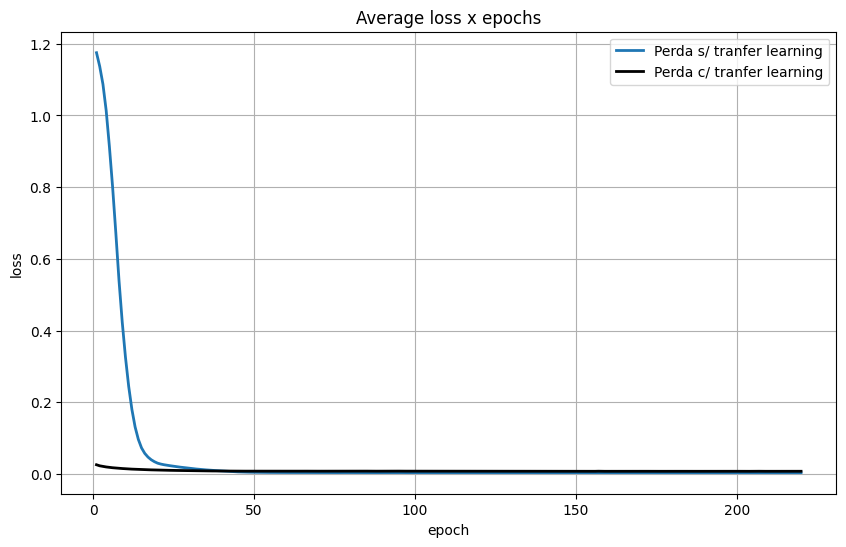

In [87]:
epocas = list(range(1, 221))
plt.plot(epocas, loss_listnl, label='Perda s/ tranfer learning',linewidth = 2)
plt.plot(epocas, loss_list4,'-s ' label='Perda c/ tranfer learning', color = 'black', linewidth = 2)
#plt.plot(epocas, loss_prime, '-o', label = 'Prime', linewidth = 2)
plt.grid()
plt.legend();
plt.title('Average loss x epochs')
plt.xlabel('epoch')
plt.ylabel('loss')

In [88]:
discard = 100
power = np.arange(-15, 0)
BER4 = np.zeros(power.size)
BER_NN4 = np.zeros(power.size)
BER_NNC4 = np.zeros(power.size)
SpS_out = 1
Ntaps = 2

for ind, Pin in enumerate(power):
    sinaltx4, symbtx4 = of.SimulaSinalOptico(SpS = SpS, Rs = Rs, M = M, Pi_dBm = Pin, num_symbs = 1e5)
    
    irx4 = of.SimulaCanalOptico(sinaltx4, SpS = SpS, Rs = Rs, dist_fibra = 4)
    
    bitsTx4 = of.RecuperaBits(sinaltx4, SpS, M)
    bitsRx4 = of.RecuperaBits(irx4, SpS, M)
    
    err = np.logical_xor(bitsRx4[discard:bitsRx4.size-discard], bitsTx4[discard:bitsTx4.size-discard])
    BER4[ind] = np.mean(err)
    
    print('BER = %.2e '%(BER4[ind]))
    
    signalrx4 = pnorm(irx4[0::SpS//SpS_out])
    signalrx4= (signalrx4 - np.mean(signalrx4))/np.std(signalrx4)
    
    dataset4 = slidingWindowDataSet(signalrx4, symbtx4, Ntaps, SpS_out)
    
    dataloader4 = DataLoader(dataset4, batch_size=len(dataset4), shuffle=False)

    symb_NN4 = of.GeraSinalEqualizado(model_test, dataloader4)

    bitsRxNN4 = demodulateGray(np.sqrt(Es)*pnorm(symb_NN4), M, 'pam')

    #discard = 1000
    err = np.logical_xor(bitsRxNN4[discard:bitsRxNN4.size-discard], bitsTx4[discard:bitsTx4.size-discard])
    BER_NN4[ind] = np.mean(err)

    #Pb = 0.5*erfc(Q/np.sqrt(2)) # theoretical error probability
    print('BER_NN = %.2e '%(BER_NN4[ind]))
    
    symb_NNC4 = of.GeraSinalEqualizado(model4, dataloader4)
    
    bitsRxNNC4 = demodulateGray(np.sqrt(Es)*pnorm(symb_NNC4), M, 'pam')

    #discard = 1000
    err = np.logical_xor(bitsRxNNC4[discard:bitsRxNNC4.size-discard], bitsTx4[discard:bitsTx4.size-discard])
    BER_NNC4[ind] = np.mean(err)

    #Pb = 0.5*erfc(Q/np.sqrt(2)) # theoretical error probability
    print('BER_NN = %.2e '%(BER_NNC4[ind]))

SymbTx antes da normalização:  [ 7. -7.  3. ... -7. -7. -7.]
BER = 2.06e-01 
BER_NN = 2.11e-01 
BER_NN = 2.05e-01 
SymbTx antes da normalização:  [-3.  5. -1. ...  3.  1. -3.]
BER = 1.72e-01 
BER_NN = 1.76e-01 
BER_NN = 1.70e-01 
SymbTx antes da normalização:  [ 7.  5. -7. ... -5. -1. -3.]
BER = 1.45e-01 
BER_NN = 1.46e-01 
BER_NN = 1.42e-01 
SymbTx antes da normalização:  [ 3.  5.  5. ... -7. -1. -3.]
BER = 1.22e-01 
BER_NN = 1.19e-01 
BER_NN = 1.17e-01 
SymbTx antes da normalização:  [-3.  1.  1. ...  1.  3. -7.]
BER = 1.02e-01 
BER_NN = 9.53e-02 
BER_NN = 9.61e-02 
SymbTx antes da normalização:  [ 7.  1.  5. ... -5. -3. -3.]
BER = 8.67e-02 
BER_NN = 7.66e-02 
BER_NN = 7.87e-02 
SymbTx antes da normalização:  [-3.  1.  7. ...  3. -3. -1.]
BER = 7.38e-02 
BER_NN = 6.27e-02 
BER_NN = 6.46e-02 
SymbTx antes da normalização:  [-7.  7. -1. ...  7. -3.  7.]
BER = 6.56e-02 
BER_NN = 5.42e-02 
BER_NN = 5.57e-02 
SymbTx antes da normalização:  [-5.  1.  5. ... -7. -5. -1.]
BER = 6.01e-02 
BER

(array([-1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6]),
 [Text(0, -1.5, '−1.5'),
  Text(0, -1.4, '−1.4'),
  Text(0, -1.3, '−1.3'),
  Text(0, -1.2, '−1.2'),
  Text(0, -1.1, '−1.1'),
  Text(0, -1.0, '−1.0'),
  Text(0, -0.8999999999999999, '−0.9'),
  Text(0, -0.7999999999999999, '−0.8'),
  Text(0, -0.7, '−0.7'),
  Text(0, -0.6, '−0.6')])

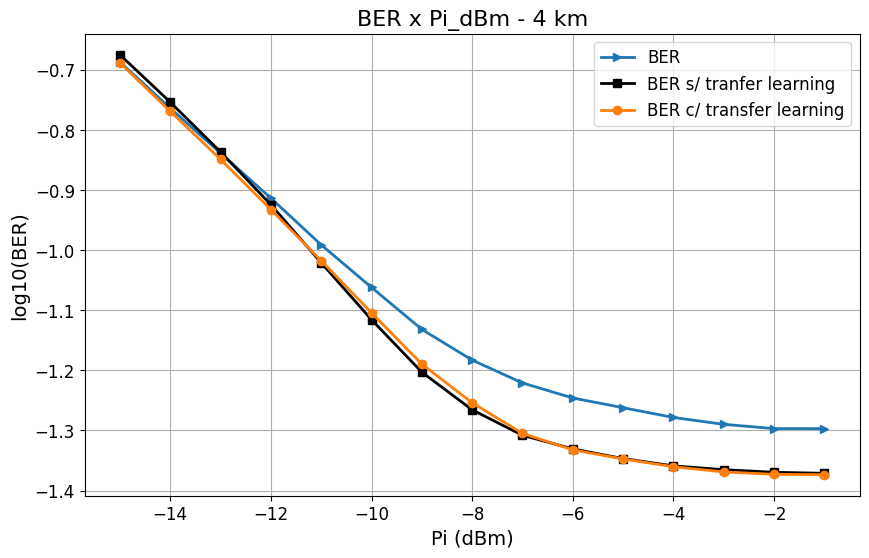

In [89]:
plt.plot(power, np.log10(BER4),'>-', label='BER',linewidth = 2)
plt.plot(power, np.log10(BER_NN4),'-s', label='BER s/ tranfer learning', color = 'black', linewidth = 2)
plt.plot(power, np.log10(BER_NNC4), '-o', label = 'BER c/ transfer learning', linewidth = 2)
plt.grid()
plt.legend(fontsize = 12);
plt.title('BER x Pi_dBm - 4 km', fontsize = 16)
plt.xlabel('Pi (dBm)', fontsize = 14)
plt.ylabel('log10(BER)', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

## Comparação entre modelos para 6 km

In [109]:
model_test = MLP([2, 6, 5, 1])
optimizer_test = torch.optim.Adam(model_test.parameters(),  lr = 0.0005)

In [110]:
loss_list = []

for t in range(1,51):
    print(f"Época {t+1}\n-------------------------------")
    of.train_loop(train_dataloader6, model6, loss_fn, optimizer6, cada_print)
    loss_list6 = test_learning(test_dataloader6, model6, loss_fn, loss_list)
print("Pronto!")

Época 2
-------------------------------
loss: 0.041347[  100/ 4000]
loss: 0.028474[ 1100/ 4000]
loss: 0.046728[ 2100/ 4000]
loss: 0.032115[ 3100/ 4000]
Perda média: 0.026996 

Época 3
-------------------------------
loss: 0.024942[  100/ 4000]
loss: 0.035171[ 1100/ 4000]
loss: 0.024487[ 2100/ 4000]
loss: 0.024008[ 3100/ 4000]
Perda média: 0.022818 

Época 4
-------------------------------
loss: 0.023216[  100/ 4000]
loss: 0.017079[ 1100/ 4000]
loss: 0.025506[ 2100/ 4000]
loss: 0.022552[ 3100/ 4000]
Perda média: 0.020791 

Época 5
-------------------------------
loss: 0.023132[  100/ 4000]
loss: 0.020055[ 1100/ 4000]
loss: 0.020820[ 2100/ 4000]
loss: 0.027878[ 3100/ 4000]
Perda média: 0.019376 

Época 6
-------------------------------
loss: 0.021908[  100/ 4000]
loss: 0.019979[ 1100/ 4000]
loss: 0.020688[ 2100/ 4000]
loss: 0.016872[ 3100/ 4000]
Perda média: 0.018219 

Época 7
-------------------------------
loss: 0.021175[  100/ 4000]
loss: 0.017415[ 1100/ 4000]
loss: 0.012627[ 2100/ 40

Perda média: 0.008022 

Época 50
-------------------------------
loss: 0.008794[  100/ 4000]
loss: 0.007437[ 1100/ 4000]
loss: 0.009019[ 2100/ 4000]
loss: 0.008956[ 3100/ 4000]
Perda média: 0.008011 

Época 51
-------------------------------
loss: 0.008599[  100/ 4000]
loss: 0.007775[ 1100/ 4000]
loss: 0.008146[ 2100/ 4000]
loss: 0.008517[ 3100/ 4000]
Perda média: 0.008033 

Pronto!


In [111]:
loss_list_test = []
for t in range(1, 51):
    print(f"Época {t+1}\n-------------------------------")
    of.train_loop(train_dataloader6, model_test, loss_fn, optimizer_test, cada_print)
    loss_listnl = test_learning(test_dataloader6, model_test, loss_fn, loss_list_test)
print("Pronto!")


Época 2
-------------------------------
loss: 1.125890[  100/ 4000]
loss: 1.036515[ 1100/ 4000]
loss: 1.152084[ 2100/ 4000]
loss: 0.934871[ 3100/ 4000]
Perda média: 0.981920 

Época 3
-------------------------------
loss: 0.952256[  100/ 4000]
loss: 1.129348[ 1100/ 4000]
loss: 0.856218[ 2100/ 4000]
loss: 0.942048[ 3100/ 4000]
Perda média: 0.912245 

Época 4
-------------------------------
loss: 0.899273[  100/ 4000]
loss: 0.834750[ 1100/ 4000]
loss: 0.907429[ 2100/ 4000]
loss: 0.856546[ 3100/ 4000]
Perda média: 0.811572 

Época 5
-------------------------------
loss: 0.868551[  100/ 4000]
loss: 0.837178[ 1100/ 4000]
loss: 0.809303[ 2100/ 4000]
loss: 0.722736[ 3100/ 4000]
Perda média: 0.691398 

Época 6
-------------------------------
loss: 0.748558[  100/ 4000]
loss: 0.718864[ 1100/ 4000]
loss: 0.663356[ 2100/ 4000]
loss: 0.635788[ 3100/ 4000]
Perda média: 0.563394 

Época 7
-------------------------------
loss: 0.636001[  100/ 4000]
loss: 0.585431[ 1100/ 4000]
loss: 0.622074[ 2100/ 40

loss: 0.016978[ 2100/ 4000]
loss: 0.018310[ 3100/ 4000]
Perda média: 0.016730 

Época 49
-------------------------------
loss: 0.014899[  100/ 4000]
loss: 0.015061[ 1100/ 4000]
loss: 0.019625[ 2100/ 4000]
loss: 0.015983[ 3100/ 4000]
Perda média: 0.015940 

Época 50
-------------------------------
loss: 0.013503[  100/ 4000]
loss: 0.013880[ 1100/ 4000]
loss: 0.013496[ 2100/ 4000]
loss: 0.015338[ 3100/ 4000]
Perda média: 0.015118 

Época 51
-------------------------------
loss: 0.015049[  100/ 4000]
loss: 0.013539[ 1100/ 4000]
loss: 0.016985[ 2100/ 4000]
loss: 0.014508[ 3100/ 4000]
Perda média: 0.014211 

Pronto!


In [112]:
'''loss_prime = []
for t in range(110):
    prime_list = test_learning(test_dataloader6, modelo_mlp, loss_fn, loss_prime)'''

'loss_prime = []\nfor t in range(110):\n    prime_list = test_learning(test_dataloader6, modelo_mlp, loss_fn, loss_prime)'

Text(0, 0.5, 'loss')

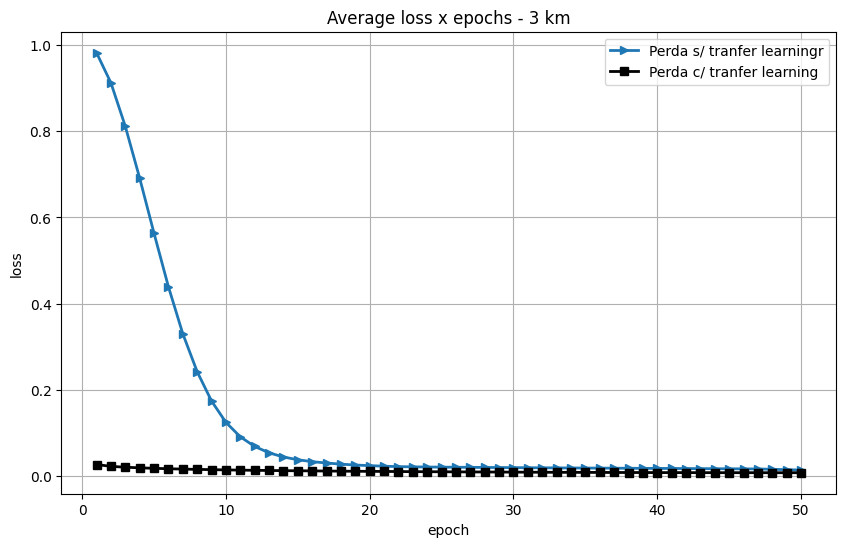

In [113]:
epocas = list(range(1, 51))
plt.plot(epocas, loss_listnl,'>-', label='Perda s/ tranfer learningr',linewidth = 2)
plt.plot(epocas, loss_list6,'-s', label='Perda c/ tranfer learning', color = 'black', linewidth = 2)
#plt.plot(epocas, prime_list, '-o', label = 'Prime', linewidth = 2)
plt.grid()
plt.legend();
plt.title('Average loss x epochs - 3 km')
plt.xlabel('epoch')
plt.ylabel('loss')

In [114]:
discard = 100
power = np.arange(-15, 0)
BER4 = np.zeros(power.size)
BER_NN4 = np.zeros(power.size)
BER_NNC4 = np.zeros(power.size)
SpS_out = 1
Ntaps = 2

for ind, Pin in enumerate(power):
    sinaltx4, symbtx4 = of.SimulaSinalOptico(SpS = SpS, Rs = Rs, M = M, Pi_dBm = Pin, num_symbs = 1e5)
    
    irx4 = of.SimulaCanalOptico(sinaltx4, SpS = SpS, Rs = Rs, dist_fibra = 3)
    
    bitsTx4 = of.RecuperaBits(sinaltx4, SpS, M)
    bitsRx4 = of.RecuperaBits(irx4, SpS, M)
    
    err = np.logical_xor(bitsRx4[discard:bitsRx4.size-discard], bitsTx4[discard:bitsTx4.size-discard])
    BER4[ind] = np.mean(err)
    
    print('BER = %.2e '%(BER4[ind]))
    
    signalrx4 = pnorm(irx4[0::SpS//SpS_out])
    signalrx4= (signalrx4 - np.mean(signalrx4))/np.std(signalrx4)
    
    dataset4 = slidingWindowDataSet(signalrx4, symbtx4, Ntaps, SpS_out)
    
    dataloader4 = DataLoader(dataset4, batch_size=len(dataset4), shuffle=False)

    symb_NN4 = of.GeraSinalEqualizado(model_test, dataloader4)

    bitsRxNN4 = demodulateGray(np.sqrt(Es)*pnorm(symb_NN4), M, 'pam')

    #discard = 1000
    err = np.logical_xor(bitsRxNN4[discard:bitsRxNN4.size-discard], bitsTx4[discard:bitsTx4.size-discard])
    BER_NN4[ind] = np.mean(err)

    #Pb = 0.5*erfc(Q/np.sqrt(2)) # theoretical error probability
    print('BER_NN = %.2e '%(BER_NN4[ind]))
    
    symb_NNC4 = of.GeraSinalEqualizado(model10, dataloader4)
    
    bitsRxNNC4 = demodulateGray(np.sqrt(Es)*pnorm(symb_NNC4), M, 'pam')

    #discard = 1000
    err = np.logical_xor(bitsRxNNC4[discard:bitsRxNNC4.size-discard], bitsTx4[discard:bitsTx4.size-discard])
    BER_NNC4[ind] = np.mean(err)

    #Pb = 0.5*erfc(Q/np.sqrt(2)) # theoretical error probability
    print('BER_NN = %.2e '%(BER_NNC4[ind]))

SymbTx antes da normalização:  [-7.  3.  3. ...  5.  3. -1.]
BER = 1.94e-01 
BER_NN = 1.94e-01 
BER_NN = 1.69e-01 
SymbTx antes da normalização:  [ 1. -5.  1. ... -5. -7. -1.]
BER = 1.61e-01 
BER_NN = 1.61e-01 
BER_NN = 1.40e-01 
SymbTx antes da normalização:  [ 5. -5.  5. ... -5. -5.  7.]
BER = 1.34e-01 
BER_NN = 1.35e-01 
BER_NN = 1.17e-01 
SymbTx antes da normalização:  [ 3.  3. -7. ...  3. -7. -5.]
BER = 1.10e-01 
BER_NN = 1.11e-01 
BER_NN = 9.91e-02 
SymbTx antes da normalização:  [-5. -5. -7. ...  1.  1.  5.]
BER = 8.99e-02 
BER_NN = 9.17e-02 
BER_NN = 8.68e-02 
SymbTx antes da normalização:  [ 3.  1.  3. ...  3. -1. -5.]
BER = 7.40e-02 
BER_NN = 7.57e-02 
BER_NN = 7.76e-02 
SymbTx antes da normalização:  [ 3. -1. -7. ... -5. -7.  5.]
BER = 6.24e-02 
BER_NN = 6.36e-02 
BER_NN = 7.11e-02 
SymbTx antes da normalização:  [ 1. -5.  1. ...  7. -1. -3.]
BER = 5.32e-02 
BER_NN = 5.46e-02 
BER_NN = 6.74e-02 
SymbTx antes da normalização:  [-7.  1.  5. ...  3.  5. -1.]
BER = 4.92e-02 
BER

(array([-1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6]),
 [Text(0, -1.5, '−1.5'),
  Text(0, -1.4, '−1.4'),
  Text(0, -1.3, '−1.3'),
  Text(0, -1.2, '−1.2'),
  Text(0, -1.1, '−1.1'),
  Text(0, -1.0, '−1.0'),
  Text(0, -0.8999999999999999, '−0.9'),
  Text(0, -0.7999999999999999, '−0.8'),
  Text(0, -0.7, '−0.7'),
  Text(0, -0.6, '−0.6')])

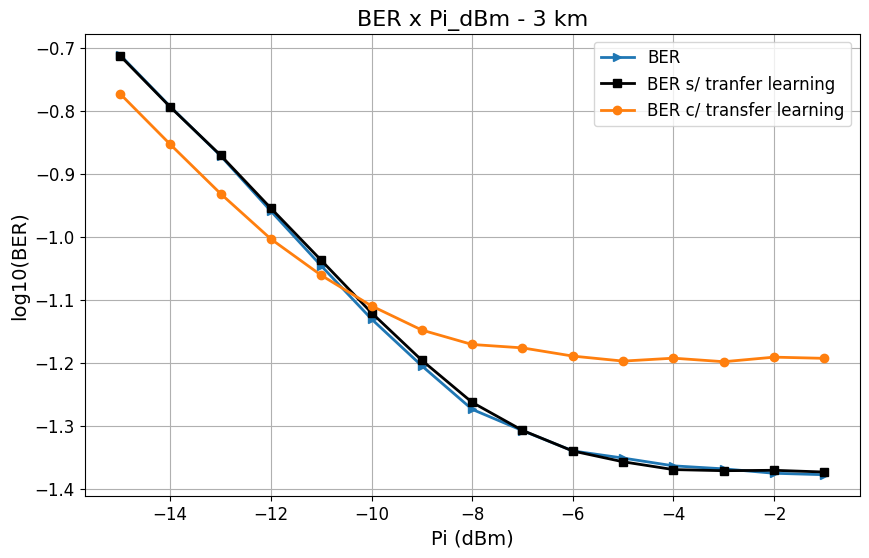

In [115]:
plt.plot(power, np.log10(BER4),'>-', label='BER',linewidth = 2)
plt.plot(power, np.log10(BER_NN4),'-s', label='BER s/ tranfer learning', color = 'black', linewidth = 2)
plt.plot(power, np.log10(BER_NNC4), '-o', label = 'BER c/ transfer learning', linewidth = 2)
plt.grid()
plt.legend(fontsize = 12);
plt.title('BER x Pi_dBm - 3 km', fontsize = 16)
plt.xlabel('Pi (dBm)', fontsize = 14)
plt.ylabel('log10(BER)', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

## Comparação entre modelos para 10 km

In [100]:
model_test = MLP([2, 6, 5, 1])
model10 = torch.load(caminho)
optimizer_test = torch.optim.Adam(model_test.parameters(),  lr = 0.0005)
optimizer10 = torch.optim.Adam(model10.parameters(), lr = 0.0005)

In [101]:
loss_list = []
epochs10 = 300

for t in range(epochs10):
    print(f"Época {t+1}\n-------------------------------")
    of.train_loop(train_dataloader10, model10, loss_fn, optimizer10, cada_print)
    loss_list10 = test_learning(test_dataloader10, model10, loss_fn, loss_list)
print("Pronto!")

Época 1
-------------------------------
loss: 0.026275[  100/ 4000]
loss: 0.028689[ 1100/ 4000]
loss: 0.029572[ 2100/ 4000]
loss: 0.033747[ 3100/ 4000]
Perda média: 0.032004 

Época 2
-------------------------------
loss: 0.023720[  100/ 4000]
loss: 0.031655[ 1100/ 4000]
loss: 0.026893[ 2100/ 4000]
loss: 0.025578[ 3100/ 4000]
Perda média: 0.029768 

Época 3
-------------------------------
loss: 0.025108[  100/ 4000]
loss: 0.023784[ 1100/ 4000]
loss: 0.022107[ 2100/ 4000]
loss: 0.031574[ 3100/ 4000]
Perda média: 0.027844 

Época 4
-------------------------------
loss: 0.021844[  100/ 4000]
loss: 0.022800[ 1100/ 4000]
loss: 0.019846[ 2100/ 4000]
loss: 0.024319[ 3100/ 4000]
Perda média: 0.026242 

Época 5
-------------------------------
loss: 0.013408[  100/ 4000]
loss: 0.021849[ 1100/ 4000]
loss: 0.021782[ 2100/ 4000]
loss: 0.017435[ 3100/ 4000]
Perda média: 0.024778 

Época 6
-------------------------------
loss: 0.020365[  100/ 4000]
loss: 0.023928[ 1100/ 4000]
loss: 0.020877[ 2100/ 40

loss: 0.010370[ 1100/ 4000]
loss: 0.008653[ 2100/ 4000]
loss: 0.009669[ 3100/ 4000]
Perda média: 0.009864 

Época 50
-------------------------------
loss: 0.010719[  100/ 4000]
loss: 0.008831[ 1100/ 4000]
loss: 0.010023[ 2100/ 4000]
loss: 0.011160[ 3100/ 4000]
Perda média: 0.009861 

Época 51
-------------------------------
loss: 0.010712[  100/ 4000]
loss: 0.010882[ 1100/ 4000]
loss: 0.012366[ 2100/ 4000]
loss: 0.011209[ 3100/ 4000]
Perda média: 0.009919 

Época 52
-------------------------------
loss: 0.007397[  100/ 4000]
loss: 0.011684[ 1100/ 4000]
loss: 0.009898[ 2100/ 4000]
loss: 0.009896[ 3100/ 4000]
Perda média: 0.009815 

Época 53
-------------------------------
loss: 0.010317[  100/ 4000]
loss: 0.007110[ 1100/ 4000]
loss: 0.013663[ 2100/ 4000]
loss: 0.009999[ 3100/ 4000]
Perda média: 0.009796 

Época 54
-------------------------------
loss: 0.009047[  100/ 4000]
loss: 0.010579[ 1100/ 4000]
loss: 0.010261[ 2100/ 4000]
loss: 0.011267[ 3100/ 4000]
Perda média: 0.009990 

Época 5

Perda média: 0.009755 

Época 96
-------------------------------
loss: 0.009146[  100/ 4000]
loss: 0.008435[ 1100/ 4000]
loss: 0.011901[ 2100/ 4000]
loss: 0.010357[ 3100/ 4000]
Perda média: 0.009781 

Época 97
-------------------------------
loss: 0.013703[  100/ 4000]
loss: 0.008826[ 1100/ 4000]
loss: 0.010658[ 2100/ 4000]
loss: 0.010383[ 3100/ 4000]
Perda média: 0.009912 

Época 98
-------------------------------
loss: 0.008014[  100/ 4000]
loss: 0.007630[ 1100/ 4000]
loss: 0.009306[ 2100/ 4000]
loss: 0.008599[ 3100/ 4000]
Perda média: 0.009747 

Época 99
-------------------------------
loss: 0.012418[  100/ 4000]
loss: 0.010823[ 1100/ 4000]
loss: 0.009669[ 2100/ 4000]
loss: 0.011766[ 3100/ 4000]
Perda média: 0.009732 

Época 100
-------------------------------
loss: 0.009441[  100/ 4000]
loss: 0.009776[ 1100/ 4000]
loss: 0.008228[ 2100/ 4000]
loss: 0.009166[ 3100/ 4000]
Perda média: 0.009717 

Época 101
-------------------------------
loss: 0.008070[  100/ 4000]
loss: 0.009442[ 1100

Perda média: 0.009833 

Época 144
-------------------------------
loss: 0.009418[  100/ 4000]
loss: 0.008312[ 1100/ 4000]
loss: 0.009417[ 2100/ 4000]
loss: 0.010005[ 3100/ 4000]
Perda média: 0.009777 

Época 145
-------------------------------
loss: 0.012883[  100/ 4000]
loss: 0.010556[ 1100/ 4000]
loss: 0.010533[ 2100/ 4000]
loss: 0.009230[ 3100/ 4000]
Perda média: 0.009733 

Época 146
-------------------------------
loss: 0.009379[  100/ 4000]
loss: 0.009444[ 1100/ 4000]
loss: 0.011186[ 2100/ 4000]
loss: 0.010673[ 3100/ 4000]
Perda média: 0.009725 

Época 147
-------------------------------
loss: 0.009504[  100/ 4000]
loss: 0.007419[ 1100/ 4000]
loss: 0.008297[ 2100/ 4000]
loss: 0.008061[ 3100/ 4000]
Perda média: 0.009687 

Época 148
-------------------------------
loss: 0.011212[  100/ 4000]
loss: 0.008644[ 1100/ 4000]
loss: 0.009975[ 2100/ 4000]
loss: 0.009168[ 3100/ 4000]
Perda média: 0.009968 

Época 149
-------------------------------
loss: 0.014383[  100/ 4000]
loss: 0.009706[ 

Perda média: 0.009713 

Época 191
-------------------------------
loss: 0.007731[  100/ 4000]
loss: 0.010237[ 1100/ 4000]
loss: 0.009003[ 2100/ 4000]
loss: 0.008296[ 3100/ 4000]
Perda média: 0.009676 

Época 192
-------------------------------
loss: 0.010306[  100/ 4000]
loss: 0.013516[ 1100/ 4000]
loss: 0.011149[ 2100/ 4000]
loss: 0.010388[ 3100/ 4000]
Perda média: 0.009786 

Época 193
-------------------------------
loss: 0.009265[  100/ 4000]
loss: 0.008315[ 1100/ 4000]
loss: 0.010901[ 2100/ 4000]
loss: 0.008739[ 3100/ 4000]
Perda média: 0.009737 

Época 194
-------------------------------
loss: 0.009095[  100/ 4000]
loss: 0.009231[ 1100/ 4000]
loss: 0.008910[ 2100/ 4000]
loss: 0.010373[ 3100/ 4000]
Perda média: 0.009718 

Época 195
-------------------------------
loss: 0.008851[  100/ 4000]
loss: 0.010349[ 1100/ 4000]
loss: 0.010019[ 2100/ 4000]
loss: 0.009698[ 3100/ 4000]
Perda média: 0.009676 

Época 196
-------------------------------
loss: 0.007949[  100/ 4000]
loss: 0.008793[ 

loss: 0.010610[ 3100/ 4000]
Perda média: 0.009151 

Época 238
-------------------------------
loss: 0.009720[  100/ 4000]
loss: 0.011317[ 1100/ 4000]
loss: 0.010147[ 2100/ 4000]
loss: 0.006762[ 3100/ 4000]
Perda média: 0.009077 

Época 239
-------------------------------
loss: 0.008538[  100/ 4000]
loss: 0.007598[ 1100/ 4000]
loss: 0.010076[ 2100/ 4000]
loss: 0.009249[ 3100/ 4000]
Perda média: 0.009067 

Época 240
-------------------------------
loss: 0.008768[  100/ 4000]
loss: 0.007113[ 1100/ 4000]
loss: 0.008824[ 2100/ 4000]
loss: 0.007762[ 3100/ 4000]
Perda média: 0.009088 

Época 241
-------------------------------
loss: 0.008698[  100/ 4000]
loss: 0.011238[ 1100/ 4000]
loss: 0.008220[ 2100/ 4000]
loss: 0.007614[ 3100/ 4000]
Perda média: 0.008951 

Época 242
-------------------------------
loss: 0.008188[  100/ 4000]
loss: 0.010867[ 1100/ 4000]
loss: 0.008621[ 2100/ 4000]
loss: 0.009392[ 3100/ 4000]
Perda média: 0.009005 

Época 243
-------------------------------
loss: 0.007502[ 

loss: 0.007996[ 2100/ 4000]
loss: 0.009093[ 3100/ 4000]
Perda média: 0.008223 

Época 286
-------------------------------
loss: 0.009005[  100/ 4000]
loss: 0.007161[ 1100/ 4000]
loss: 0.008479[ 2100/ 4000]
loss: 0.006492[ 3100/ 4000]
Perda média: 0.008386 

Época 287
-------------------------------
loss: 0.009003[  100/ 4000]
loss: 0.008089[ 1100/ 4000]
loss: 0.006397[ 2100/ 4000]
loss: 0.007700[ 3100/ 4000]
Perda média: 0.008228 

Época 288
-------------------------------
loss: 0.009152[  100/ 4000]
loss: 0.006520[ 1100/ 4000]
loss: 0.005639[ 2100/ 4000]
loss: 0.006935[ 3100/ 4000]
Perda média: 0.008234 

Época 289
-------------------------------
loss: 0.006861[  100/ 4000]
loss: 0.009005[ 1100/ 4000]
loss: 0.005651[ 2100/ 4000]
loss: 0.008810[ 3100/ 4000]
Perda média: 0.008257 

Época 290
-------------------------------
loss: 0.006562[  100/ 4000]
loss: 0.005880[ 1100/ 4000]
loss: 0.008167[ 2100/ 4000]
loss: 0.008434[ 3100/ 4000]
Perda média: 0.008207 

Época 291
--------------------

In [102]:
loss_list_test = []
for t in range(epochs10):
    print(f"Época {t+1}\n-------------------------------")
    of.train_loop(train_dataloader10, model_test, loss_fn, optimizer_test, cada_print)
    loss_listnl = test_learning(test_dataloader10, model_test, loss_fn, loss_list_test)
print("Pronto!")

Época 1
-------------------------------
loss: 1.120449[  100/ 4000]
loss: 0.956058[ 1100/ 4000]
loss: 0.980997[ 2100/ 4000]
loss: 0.964740[ 3100/ 4000]
Perda média: 1.050564 

Época 2
-------------------------------
loss: 0.991378[  100/ 4000]
loss: 0.944728[ 1100/ 4000]
loss: 1.003756[ 2100/ 4000]
loss: 1.045810[ 3100/ 4000]
Perda média: 1.036149 

Época 3
-------------------------------
loss: 0.978091[  100/ 4000]
loss: 0.855745[ 1100/ 4000]
loss: 0.843771[ 2100/ 4000]
loss: 0.947628[ 3100/ 4000]
Perda média: 1.016721 

Época 4
-------------------------------
loss: 1.138991[  100/ 4000]
loss: 0.789090[ 1100/ 4000]
loss: 0.813765[ 2100/ 4000]
loss: 0.895833[ 3100/ 4000]
Perda média: 0.987752 

Época 5
-------------------------------
loss: 0.775229[  100/ 4000]
loss: 0.926556[ 1100/ 4000]
loss: 0.907208[ 2100/ 4000]
loss: 0.782083[ 3100/ 4000]
Perda média: 0.945501 

Época 6
-------------------------------
loss: 0.825952[  100/ 4000]
loss: 0.877232[ 1100/ 4000]
loss: 0.763304[ 2100/ 40

loss: 0.014435[ 3100/ 4000]
Perda média: 0.016223 

Época 48
-------------------------------
loss: 0.017057[  100/ 4000]
loss: 0.015538[ 1100/ 4000]
loss: 0.019523[ 2100/ 4000]
loss: 0.016045[ 3100/ 4000]
Perda média: 0.015908 

Época 49
-------------------------------
loss: 0.019239[  100/ 4000]
loss: 0.016582[ 1100/ 4000]
loss: 0.019958[ 2100/ 4000]
loss: 0.016373[ 3100/ 4000]
Perda média: 0.015565 

Época 50
-------------------------------
loss: 0.014669[  100/ 4000]
loss: 0.016576[ 1100/ 4000]
loss: 0.014865[ 2100/ 4000]
loss: 0.013193[ 3100/ 4000]
Perda média: 0.015303 

Época 51
-------------------------------
loss: 0.016487[  100/ 4000]
loss: 0.014356[ 1100/ 4000]
loss: 0.017607[ 2100/ 4000]
loss: 0.013262[ 3100/ 4000]
Perda média: 0.015017 

Época 52
-------------------------------
loss: 0.014245[  100/ 4000]
loss: 0.014924[ 1100/ 4000]
loss: 0.016082[ 2100/ 4000]
loss: 0.015948[ 3100/ 4000]
Perda média: 0.014864 

Época 53
-------------------------------
loss: 0.014456[  100/ 

loss: 0.007859[ 3100/ 4000]
Perda média: 0.009804 

Época 96
-------------------------------
loss: 0.011225[  100/ 4000]
loss: 0.010071[ 1100/ 4000]
loss: 0.009195[ 2100/ 4000]
loss: 0.009078[ 3100/ 4000]
Perda média: 0.009863 

Época 97
-------------------------------
loss: 0.009965[  100/ 4000]
loss: 0.008661[ 1100/ 4000]
loss: 0.010380[ 2100/ 4000]
loss: 0.009509[ 3100/ 4000]
Perda média: 0.009752 

Época 98
-------------------------------
loss: 0.009999[  100/ 4000]
loss: 0.010120[ 1100/ 4000]
loss: 0.009278[ 2100/ 4000]
loss: 0.008798[ 3100/ 4000]
Perda média: 0.009798 

Época 99
-------------------------------
loss: 0.013913[  100/ 4000]
loss: 0.008925[ 1100/ 4000]
loss: 0.011546[ 2100/ 4000]
loss: 0.008742[ 3100/ 4000]
Perda média: 0.009770 

Época 100
-------------------------------
loss: 0.011291[  100/ 4000]
loss: 0.010175[ 1100/ 4000]
loss: 0.011263[ 2100/ 4000]
loss: 0.010135[ 3100/ 4000]
Perda média: 0.009723 

Época 101
-------------------------------
loss: 0.012157[  100

loss: 0.007943[ 2100/ 4000]
loss: 0.010243[ 3100/ 4000]
Perda média: 0.009210 

Época 144
-------------------------------
loss: 0.009798[  100/ 4000]
loss: 0.009832[ 1100/ 4000]
loss: 0.008530[ 2100/ 4000]
loss: 0.010348[ 3100/ 4000]
Perda média: 0.009066 

Época 145
-------------------------------
loss: 0.009984[  100/ 4000]
loss: 0.009877[ 1100/ 4000]
loss: 0.011437[ 2100/ 4000]
loss: 0.008352[ 3100/ 4000]
Perda média: 0.009079 

Época 146
-------------------------------
loss: 0.010134[  100/ 4000]
loss: 0.007849[ 1100/ 4000]
loss: 0.008214[ 2100/ 4000]
loss: 0.008253[ 3100/ 4000]
Perda média: 0.009019 

Época 147
-------------------------------
loss: 0.011682[  100/ 4000]
loss: 0.008196[ 1100/ 4000]
loss: 0.007773[ 2100/ 4000]
loss: 0.009272[ 3100/ 4000]
Perda média: 0.009014 

Época 148
-------------------------------
loss: 0.008729[  100/ 4000]
loss: 0.008843[ 1100/ 4000]
loss: 0.009005[ 2100/ 4000]
loss: 0.009076[ 3100/ 4000]
Perda média: 0.009008 

Época 149
--------------------

Perda média: 0.006682 

Época 191
-------------------------------
loss: 0.007135[  100/ 4000]
loss: 0.006375[ 1100/ 4000]
loss: 0.007966[ 2100/ 4000]
loss: 0.008503[ 3100/ 4000]
Perda média: 0.006675 

Época 192
-------------------------------
loss: 0.007611[  100/ 4000]
loss: 0.006767[ 1100/ 4000]
loss: 0.006312[ 2100/ 4000]
loss: 0.008125[ 3100/ 4000]
Perda média: 0.006801 

Época 193
-------------------------------
loss: 0.006750[  100/ 4000]
loss: 0.006233[ 1100/ 4000]
loss: 0.007316[ 2100/ 4000]
loss: 0.006168[ 3100/ 4000]
Perda média: 0.006670 

Época 194
-------------------------------
loss: 0.008751[  100/ 4000]
loss: 0.008408[ 1100/ 4000]
loss: 0.006795[ 2100/ 4000]
loss: 0.006642[ 3100/ 4000]
Perda média: 0.006748 

Época 195
-------------------------------
loss: 0.005929[  100/ 4000]
loss: 0.004877[ 1100/ 4000]
loss: 0.007275[ 2100/ 4000]
loss: 0.006171[ 3100/ 4000]
Perda média: 0.006610 

Época 196
-------------------------------
loss: 0.006134[  100/ 4000]
loss: 0.008082[ 

loss: 0.006502[ 2100/ 4000]
loss: 0.006123[ 3100/ 4000]
Perda média: 0.006100 

Época 238
-------------------------------
loss: 0.007120[  100/ 4000]
loss: 0.005290[ 1100/ 4000]
loss: 0.006539[ 2100/ 4000]
loss: 0.006071[ 3100/ 4000]
Perda média: 0.006080 

Época 239
-------------------------------
loss: 0.005751[  100/ 4000]
loss: 0.009224[ 1100/ 4000]
loss: 0.007005[ 2100/ 4000]
loss: 0.007093[ 3100/ 4000]
Perda média: 0.006094 

Época 240
-------------------------------
loss: 0.007338[  100/ 4000]
loss: 0.007444[ 1100/ 4000]
loss: 0.005053[ 2100/ 4000]
loss: 0.010529[ 3100/ 4000]
Perda média: 0.006082 

Época 241
-------------------------------
loss: 0.005739[  100/ 4000]
loss: 0.006902[ 1100/ 4000]
loss: 0.006216[ 2100/ 4000]
loss: 0.008177[ 3100/ 4000]
Perda média: 0.006102 

Época 242
-------------------------------
loss: 0.005861[  100/ 4000]
loss: 0.008305[ 1100/ 4000]
loss: 0.006397[ 2100/ 4000]
loss: 0.007178[ 3100/ 4000]
Perda média: 0.006136 

Época 243
--------------------

loss: 0.007824[  100/ 4000]
loss: 0.005697[ 1100/ 4000]
loss: 0.005138[ 2100/ 4000]
loss: 0.004523[ 3100/ 4000]
Perda média: 0.005972 

Época 286
-------------------------------
loss: 0.008864[  100/ 4000]
loss: 0.006078[ 1100/ 4000]
loss: 0.006282[ 2100/ 4000]
loss: 0.004750[ 3100/ 4000]
Perda média: 0.005974 

Época 287
-------------------------------
loss: 0.006466[  100/ 4000]
loss: 0.006920[ 1100/ 4000]
loss: 0.005710[ 2100/ 4000]
loss: 0.007170[ 3100/ 4000]
Perda média: 0.006091 

Época 288
-------------------------------
loss: 0.005902[  100/ 4000]
loss: 0.007629[ 1100/ 4000]
loss: 0.006608[ 2100/ 4000]
loss: 0.005581[ 3100/ 4000]
Perda média: 0.005985 

Época 289
-------------------------------
loss: 0.003798[  100/ 4000]
loss: 0.006784[ 1100/ 4000]
loss: 0.006574[ 2100/ 4000]
loss: 0.004941[ 3100/ 4000]
Perda média: 0.006103 

Época 290
-------------------------------
loss: 0.004809[  100/ 4000]
loss: 0.006652[ 1100/ 4000]
loss: 0.005081[ 2100/ 4000]
loss: 0.004844[ 3100/ 4000

In [103]:
'''loss_prime = []
for t in range(80):
    prime_list = test_learning(test_dataloader10, modelo_mlp, loss_fn, loss_prime)'''

'loss_prime = []\nfor t in range(80):\n    prime_list = test_learning(test_dataloader10, modelo_mlp, loss_fn, loss_prime)'

Text(0, 0.5, 'loss')

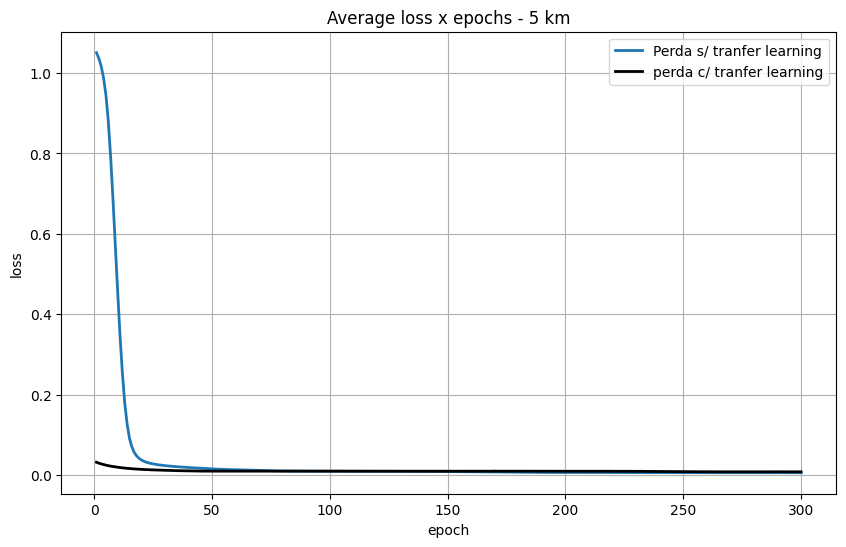

In [105]:
epocas = list(range(1, 301))
plt.plot(epocas, loss_listnl, label='Perda s/ tranfer learning',linewidth = 2)
plt.plot(epocas, loss_list10, label='perda c/ tranfer learning', color = 'black', linewidth = 2)
#plt.plot(epocas, loss_prime, '-o', label = 'Prime', linewidth = 2)
plt.grid()
plt.legend();
plt.title('Average loss x epochs - 5 km')
plt.xlabel('epoch')
plt.ylabel('loss')

In [98]:
discard = 100
power = np.arange(-15, 0)
BER4 = np.zeros(power.size)
BER_NN4 = np.zeros(power.size)
BER_NNC4 = np.zeros(power.size)
SpS_out = 1
Ntaps = 2

for ind, Pin in enumerate(power):
    sinaltx4, symbtx4 = of.SimulaSinalOptico(SpS = SpS, Rs = Rs, M = M, Pi_dBm = Pin, num_symbs = 1e5)
    
    irx4 = of.SimulaCanalOptico(sinaltx4, SpS = SpS, Rs = Rs, dist_fibra = 5)
    
    bitsTx4 = of.RecuperaBits(sinaltx4, SpS, M)
    bitsRx4 = of.RecuperaBits(irx4, SpS, M)
    
    err = np.logical_xor(bitsRx4[discard:bitsRx4.size-discard], bitsTx4[discard:bitsTx4.size-discard])
    BER4[ind] = np.mean(err)
    
    print('BER = %.2e '%(BER4[ind]))
    
    signalrx4 = pnorm(irx4[0::SpS//SpS_out])
    signalrx4= (signalrx4 - np.mean(signalrx4))/np.std(signalrx4)
    
    dataset4 = slidingWindowDataSet(signalrx4, symbtx4, Ntaps, SpS_out)
    
    dataloader4 = DataLoader(dataset4, batch_size=len(dataset4), shuffle=False)

    symb_NN4 = of.GeraSinalEqualizado(model_test, dataloader4)

    bitsRxNN4 = demodulateGray(np.sqrt(Es)*pnorm(symb_NN4), M, 'pam')

    #discard = 1000
    err = np.logical_xor(bitsRxNN4[discard:bitsRxNN4.size-discard], bitsTx4[discard:bitsTx4.size-discard])
    BER_NN4[ind] = np.mean(err)

    #Pb = 0.5*erfc(Q/np.sqrt(2)) # theoretical error probability
    print('BER_NN = %.2e '%(BER_NN4[ind]))
    
    symb_NNC4 = of.GeraSinalEqualizado(model10, dataloader4)
    
    bitsRxNNC4 = demodulateGray(np.sqrt(Es)*pnorm(symb_NNC4), M, 'pam')

    #discard = 1000
    err = np.logical_xor(bitsRxNNC4[discard:bitsRxNNC4.size-discard], bitsTx4[discard:bitsTx4.size-discard])
    BER_NNC4[ind] = np.mean(err)

    #Pb = 0.5*erfc(Q/np.sqrt(2)) # theoretical error probability
    print('BER_NN = %.2e '%(BER_NNC4[ind]))

SymbTx antes da normalização:  [-5.  5.  5. ...  7.  5. -7.]
BER = 2.22e-01 
BER_NN = 2.23e-01 
BER_NN = 2.20e-01 
SymbTx antes da normalização:  [-7.  5.  3. ... -1. -3.  7.]
BER = 1.89e-01 
BER_NN = 1.86e-01 
BER_NN = 1.84e-01 
SymbTx antes da normalização:  [ 7. -1.  7. ... -3. -5.  5.]
BER = 1.62e-01 
BER_NN = 1.55e-01 
BER_NN = 1.55e-01 
SymbTx antes da normalização:  [-1.  1. -7. ...  3.  1.  3.]
BER = 1.39e-01 
BER_NN = 1.28e-01 
BER_NN = 1.30e-01 
SymbTx antes da normalização:  [ 1. -7. -7. ...  1. -3.  7.]
BER = 1.23e-01 
BER_NN = 1.05e-01 
BER_NN = 1.09e-01 
SymbTx antes da normalização:  [ 3.  3.  1. ...  3. -5.  5.]
BER = 1.08e-01 
BER_NN = 8.49e-02 
BER_NN = 9.03e-02 
SymbTx antes da normalização:  [-1. -7.  1. ...  3.  3. -1.]
BER = 9.57e-02 
BER_NN = 6.89e-02 
BER_NN = 7.41e-02 
SymbTx antes da normalização:  [-3. -7.  3. ...  5. -1. -1.]
BER = 8.92e-02 
BER_NN = 5.98e-02 
BER_NN = 6.52e-02 
SymbTx antes da normalização:  [ 3.  1. -5. ...  5. -3.  3.]
BER = 8.33e-02 
BER

(array([-1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6]),
 [Text(0, -1.4000000000000001, '−1.4'),
  Text(0, -1.3, '−1.3'),
  Text(0, -1.2000000000000002, '−1.2'),
  Text(0, -1.1, '−1.1'),
  Text(0, -1.0, '−1.0'),
  Text(0, -0.9000000000000001, '−0.9'),
  Text(0, -0.8, '−0.8'),
  Text(0, -0.7000000000000001, '−0.7'),
  Text(0, -0.6000000000000001, '−0.6')])

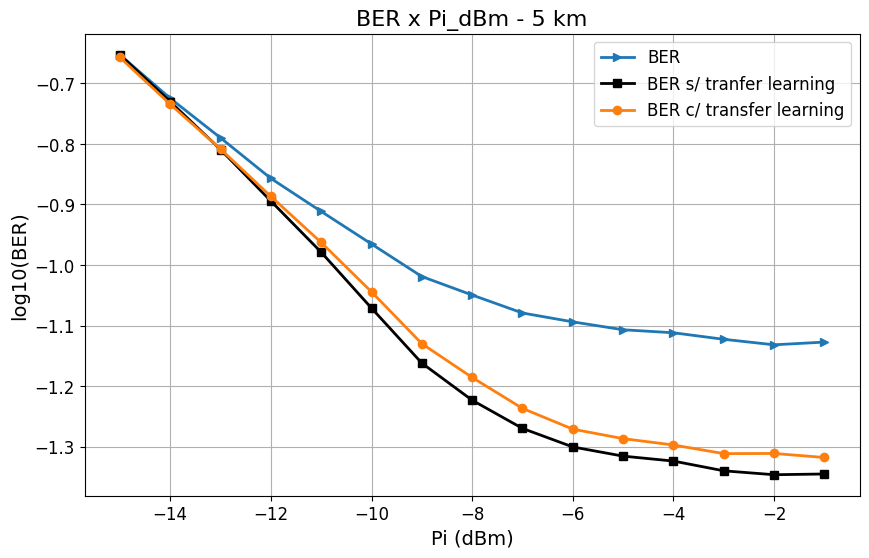

In [99]:
plt.plot(power, np.log10(BER4),'>-', label='BER',linewidth = 2)
plt.plot(power, np.log10(BER_NN4),'-s', label='BER s/ tranfer learning', color = 'black', linewidth = 2)
plt.plot(power, np.log10(BER_NNC4), '-o', label = 'BER c/ transfer learning', linewidth = 2)
plt.grid()
plt.legend(fontsize = 12);
plt.title('BER x Pi_dBm - 5 km', fontsize = 16)
plt.xlabel('Pi (dBm)', fontsize = 14)
plt.ylabel('log10(BER)', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)